In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import linalg as la
from scipy import sparse as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D

In [579]:
def eulstep(A, uold, h):
    step = np.dot(A,h)
    unew = uold + np.dot(uold,step)
    return unew

def solver(A, y0, t0, tf, N):
    plot = []
    h = (tf-t0)/N
    uold = y0
    for i in range(N):
        u = unew(A, uold, h)
        plot.append(u)
        uold = u
    return [u,plot, Narr]

def TRstep(T,uold,dt):
    A = np.identity(len(T))-dt/2*T
    y = np.identity(len(T))+dt/2*T
    step = la.solve(A,y.dot(uold))
    return step #np.insert(step, len(step), step[0])


def LaxWenStep(uold, amu):
    
    return np.dot(get_matrix(amu, uold), uold)
        
    
def get_matrix(amu, uold):
    sup = amu/2*(amu-1)*np.ones(len(uold)-1)
    mid = (1-amu**2)*np.ones(len(uold))
    sub = amu/2*(amu+1)*np.ones(len(uold)-1)
    A = np.diag(sub, -1) + np.diag(mid, 0) + np.diag(sup, 1)
    A[0][-1] = amu/2*(amu+1)
    A[-1][0] = amu/2*(amu-1)
    
    return A
        

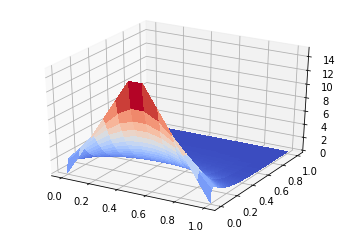

In [580]:
## Space
N = 10
deltaX = 1/(N+1)
xgrid = np.linspace(0,1,N+2)

## Time
M = 10000
tf = 1
deltaT = tf/M
tgrid = np.linspace(deltaT,tf,M)

## Initial value:
g = np.zeros(N+2)

#dirac
#g[int((N+1)/2)]= 1

#triangular
for i in range(len(xgrid)):
    if i < len(xgrid)/2:
        g[i] = 3*i
    if i >= len(xgrid)/2:
        g[i] = 3*(len(xgrid)-i-1)

## toeplitz
sub = np.ones(N+1)/(deltaX**2)
sup = np.ones(N+1)/(deltaX**2)
mid = -2*np.ones(N+2)/(deltaX**2)
toep = np.diag(sub, -1) + np.diag(mid, 0) + np.diag(sup, 1)
uold = g

##time-stepping the solution
uarray = [uold]
u
time = []
for i in range(M):
    u = eulstep(toep,uold,deltaT)
    uold = u
    uarray.append(uold)
uarray = np.array(uarray)

##Meshgrid (??)
xx = np.linspace(0,1,N+2)
tt = np.linspace(0,tf,M+1)
X, T = np.meshgrid(xx,tt)

#Prepare plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
surf = ax.plot_surface(X, T, uarray, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [582]:
uold = g
solution = [uold]
for i in range(M):
    u = TRstep(toep,uold,deltaT)
    solution.append(u)
    uold = u
solution = np.array(solution)

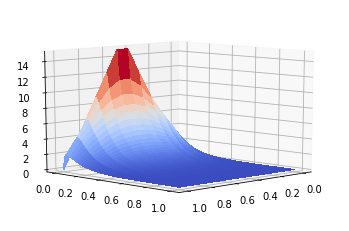

In [584]:
#Prepare plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
ax.view_init(10,45)
surf = ax.plot_surface(X, T, solution, cmap=cm.coolwarm, linewidth=0, antialiased=False)

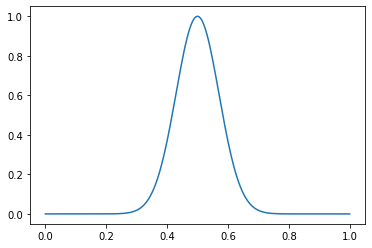

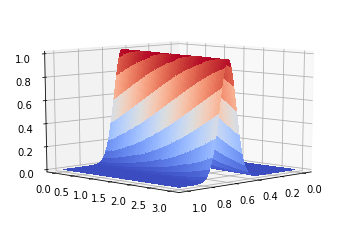

In [561]:
N = 200
M = 2000
a = 0

dT = 1/M    #tf/numer of steps 
dX = 1/N    #lenght/number of steps

amu = 0.01
g = np.zeros(N+1)
#func = 'triang'
func = 'expwave'

for i in range(N+1):
    if i < (N+1)/2 and func == 'triang':
        g[i] = i
    if i >= len(xgrid)/2 and func == 'triang':
        g[i] = (N-i)
    if func == 'expwave':
        g[i] = np.exp(-((i-N/2)/20)**2)
        
uold = g
sol = [uold]
for i in range(M):
    unew = LaxWenStep(uold,amu)
    sol.append(unew)
    uold = unew
sol = np.array(sol)

xx = np.linspace(0,1,N+1)
tt = np.linspace(0,3,M+1)
X, T = np.meshgrid(xx,tt)

plt.plot(np.linspace(0,1,N+1),g)
plt.show()

#Prepare plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
#ax.set_zlim(0, 200)
ax.view_init(10,45)
surf = ax.plot_surface(X, T, sol, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [416]:
ax.view_init(30, angle)
plt.show()

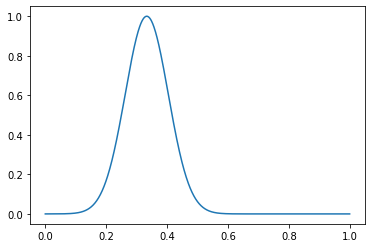

The mesh Peclet number is 0.01


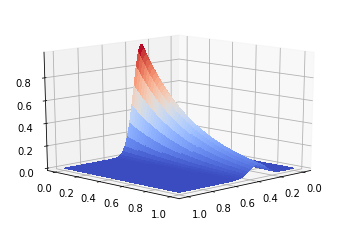

In [560]:
a = 1
d = 0.1
N = 1000
M = 1000
tf = 1

dx = 1/N
dt = tf/M


sub = d/(dx**2)*np.ones(N-1) + a/(2*dx)*np.ones(N-1)
sup = d/(dx**2)*np.ones(N-1) - a/(2*dx)*np.ones(N-1)
mid = -2*np.ones(N)/(dx**2)


diffMat = np.diag(sub, -1) + np.diag(mid, 0) + np.diag(sup, 1)
diffMat[0, -1] = diffMat[1, 0]
diffMat[-1, 0] = diffMat[0, 1]

g = np.zeros(N+1)
#func = 'triang'
func = 'expwave'

for i in range(N+1):
    if i < (N+1)/2 and func == 'triang':
        g[i] = i
    if i >= len(xgrid)/2 and func == 'triang':
        g[i] = (N-i)
    if func == 'expwave':
        g[i] = np.exp(-(10*(i-N/3)/N)**2)

uold = g
sol = [uold]

for i in range(M):
    u = TRstep(diffMat,uold[:-1],dt)

    sol.append(u)
    uold = u

sol = np.array(sol)

xx = np.linspace(0,1,N+1)
tt = np.linspace(0,tf,M+1)
X, T = np.meshgrid(xx,tt)

plt.plot(np.linspace(0,1,N+1),g)
plt.show()

#Prepare plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
#ax.set_zlim(0, 200)
ax.view_init(15,45)
surf = ax.plot_surface(X, T, np.abs(sol), cmap=cm.coolwarm, linewidth=0, antialiased=False)
print(f'The mesh Peclet number is {a/d*dx}')    

(101, 10)
(101, 10)


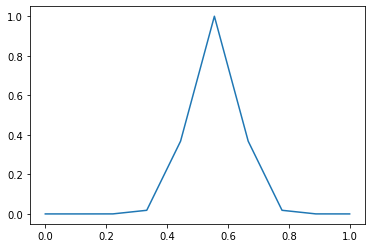

In [702]:
N = 10
M = 100
tf = 1
dx = 1/N
dt = tf/M
d = 0.1

g = np.zeros(N)
for i in range(N):
    g[i] = np.exp(-(10*(i-N/2)/N)**2)
plt.plot(np.linspace(0,tf,N),g)

Tsub = 1/(dx**2)*np.ones(N-1) 
Tsup = 1/(dx**2)*np.ones(N-1)  
Tmid = -2*np.ones(N)/(dx**2)
T = np.diag(Tsub, -1) + np.diag(Tmid, 0) + np.diag(Tsup, 1)

Ssub = 1/(2*dx)*np.ones(N-1)
Ssup = -1/(2*dx)*np.ones(N-1)
S = np.diag(Ssub, -1) + np.diag(Ssup, 1)

uold = g
Z = [uold]
LWmat = -dt*S+dt**2/2*S**2+dt**2/2*T
LWmat[-1][0] = LWmat[0][1]
LWmat[0][-1] = LWmat[1][0]

VLdiffusion = np.identity(N)-d*dt/2*T

for i in range(M):
    unew = la.solve(VLdiffusion,LWmat.dot(uold)+d*dt/2*T.dot(uold))
    Z.append(unew)
    uold = unew

Z = np.array(Z)


xx = np.linspace(0,1,N)
tt = np.linspace(0,tf,M+1)
X, T = np.meshgrid(xx,tt)

print(X.shape)
print(T.shape)

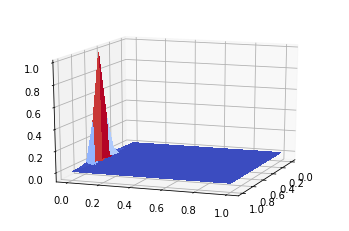

In [703]:
#Prepare plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
ax.view_init(15,20)
surf = ax.plot_surface(X, T, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [592]:
S

array([[ 0. , -1.5,  0. ],
       [ 1.5,  0. , -1.5],
       [ 0. ,  1.5,  0. ]])

In [593]:
S**2

array([[0.  , 2.25, 0.  ],
       [2.25, 0.  , 2.25],
       [0.  , 2.25, 0.  ]])